In [24]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import sys
import jax
import os
import jax.numpy as jnp
import matplotlib.pyplot as plt
from src.core.derivatives import get_calculus_engine
from src.core.functional import rosenbrock
import numpy as np
jax.config.update("jax_enable_x64", True)

In [27]:
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)

if project_root not in sys.path:
    sys.path.append(project_root)
from src.core.derivatives import get_calculus_engine
from src.optimizers.second_order import NewtonOptimizer
from src.core.functional import rosenbrock

In [31]:
def run_spectral_analysis(path, hess_fn): 
    iterations = np.arange(len(path))
    eigenvalues = []
    condition_numbers = []

    for p in path:
        H = hess_fn(jnp.array(p))
        evs = jnp.linalg.eigvalsh(H)
        eigenvalues.append(evs)
        condition_numbers.append(evs[-1] / evs[0])

    eigenvalues = np.array(eigenvalues)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    ax1.plot(iterations, eigenvalues[:, 0], label=r'$\lambda_{min}$', marker='s', color='royalblue')
    ax1.plot(iterations, eigenvalues[:, 1], label=r'$\lambda_{max}$', marker='^', color='crimson')
    ax1.set_ylabel("Eigenvalue Magnitude")
    ax1.set_title("Hessian Eigenvalue Evolution (Stability Analysis)")
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)

    ax2.plot(iterations, condition_numbers, label=r'Condition Number $\kappa$', color='indigo', marker='o')
    ax2.set_yscale('log')
    ax2.set_ylabel(r"$\kappa$ (Log Scale)")
    ax2.set_xlabel("Iteration")
    ax2.set_title("Hessian Condition Number (Ill-conditioning)")
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

In [28]:
grad_fn, hess_fn = get_calculus_engine(rosenbrock)
optimizer = NewtonOptimizer(damping=1e-6)

x = jnp.array([-1.2, 1.0])
path = [x]

for _ in range(30):
    x = optimizer.step(x, grad_fn, hess_fn)
    path.append(x)
    if jnp.linalg.norm(grad_fn(x)) < 1e-7:
        break

print(f"Captured {len(path)} points along the Newton trajectory.")

Captured 7 points along the Newton trajectory.


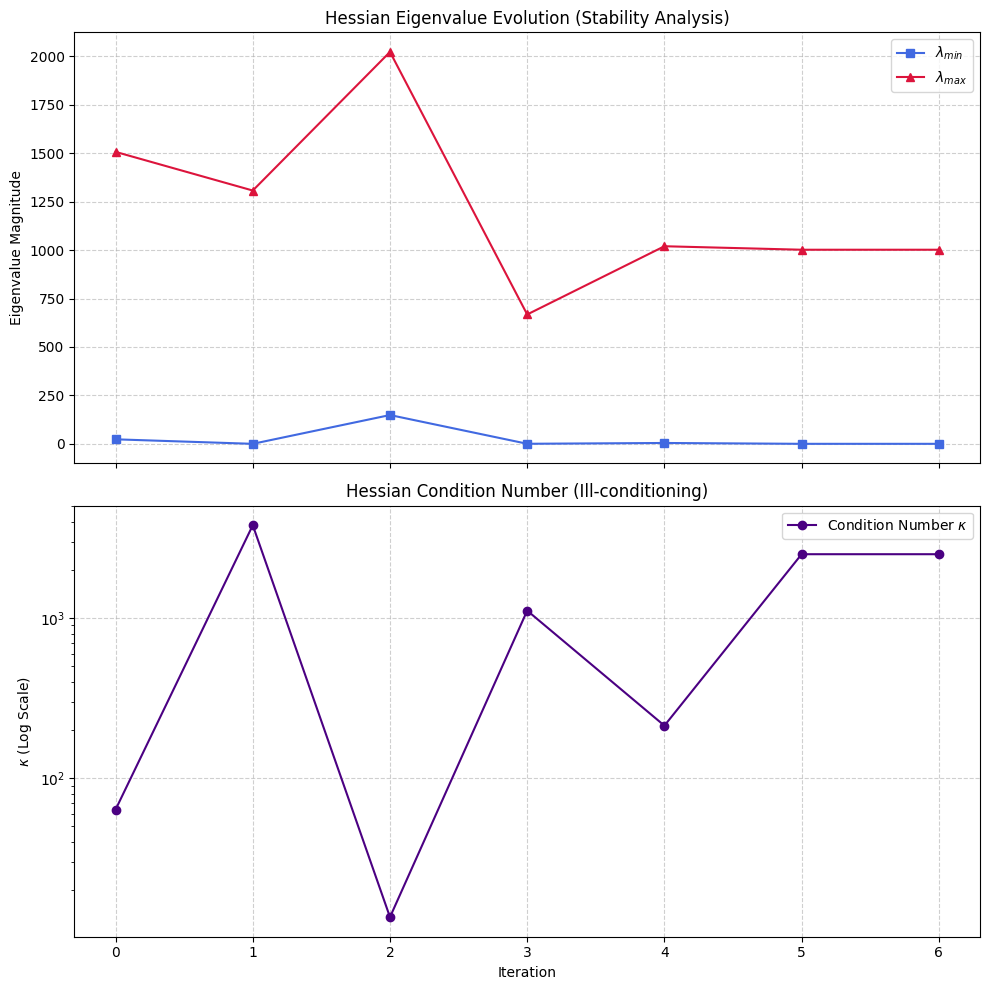

In [32]:
run_spectral_analysis(path, hess_fn)